In [1]:
# DHFR Mutation Analysis (No Heterozygous)

#Analysis of DHFR resistance markers: Asn51Ile, Cys59Arg, and Ser108Asn
print("SALAM YA RASSOULALLAH")
print("DHFR Mutation Analysis (No Heterozygous)")

SALAM YA RASSOULALLAH
DHFR Mutation Analysis (No Heterozygous)


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load and Explore Data

In [3]:
# Load the data
df = pd.read_csv('DATA/csv/dhfr_prevalences_input_table_1.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (553, 4)

First few rows:
     Sample ID  Asn51Ile  Cys59Arg  Ser108Asn
0  MSY_01-1291       1.0       1.0        1.0
1  MSY_01-2013       1.0       1.0        1.0
2  MSY_01-0023       1.0       1.0        1.0
3  MSY_01-0186       1.0       1.0        1.0
4  MSY_01-0051       1.0       1.0        1.0

Data types:
Sample ID        str
Asn51Ile     float64
Cys59Arg     float64
Ser108Asn    float64
dtype: object

Missing values per column:
Sample ID     0
Asn51Ile     20
Cys59Arg     19
Ser108Asn    21
dtype: int64


## 2. Data Cleaning and Preparation

In [4]:
# Create a clean dataset excluding samples with any missing mutation data
mutation_cols = ['Asn51Ile', 'Cys59Arg', 'Ser108Asn']
df_clean = df.dropna(subset=mutation_cols).copy()

print(f"Original samples: {len(df)}")
print(f"Samples with complete mutation data: {len(df_clean)}")
print(f"Samples excluded: {len(df) - len(df_clean)}")

# Ensure mutation columns are integers
for col in mutation_cols:
    df_clean[col] = df_clean[col].astype(int)

Original samples: 553
Samples with complete mutation data: 530
Samples excluded: 23


## 3. Calculate Individual Mutation Prevalence

In [5]:
# Calculate prevalence for each mutation
prevalence = {}
for col in mutation_cols:
    count_mutant = (df_clean[col] == 1).sum()
    total = len(df_clean)
    prevalence[col] = (count_mutant / total) * 100

prevalence_df = pd.DataFrame(list(prevalence.items()), columns=['Mutation', 'Prevalence (%)'])
print("\nIndividual Mutation Prevalence:")
print(prevalence_df)


Individual Mutation Prevalence:
    Mutation  Prevalence (%)
0   Asn51Ile       91.698113
1   Cys59Arg       96.792453
2  Ser108Asn       98.679245


## 4. Calculate Haplotype (Mutation Combination) Frequencies

In [6]:
# Create haplotype string for each sample (e.g., "1-1-1" for triple mutant)
df_clean['Haplotype'] = (df_clean['Asn51Ile'].astype(str) + '-' + 
                        df_clean['Cys59Arg'].astype(str) + '-' + 
                        df_clean['Ser108Asn'].astype(str))

# Count frequency of each haplotype
haplotype_counts = df_clean['Haplotype'].value_counts()
haplotype_prevalence = (haplotype_counts / len(df_clean) * 100).round(2)

# Create a summary dataframe
haplotype_summary = pd.DataFrame({
    'Haplotype': haplotype_counts.index,
    'Count': haplotype_counts.values,
    'Prevalence (%)': haplotype_prevalence.values
})

# Add descriptive names
haplotype_names = {
    '1-1-1': 'Triple Mutant (51I+59R+108N)',
    '0-0-0': 'Wild Type',
    '0-1-1': 'Double Mutant (59R+108N)',
    '1-0-1': 'Double Mutant (51I+108N)',
    '1-1-0': 'Double Mutant (51I+59R)',
    '0-0-1': 'Single Mutant (108N)',
    '0-1-0': 'Single Mutant (59R)',
    '1-0-0': 'Single Mutant (51I)'
}
haplotype_summary['Description'] = haplotype_summary['Haplotype'].map(haplotype_names)

print("\nHaplotype Frequencies:")
print(haplotype_summary.to_string(index=False))


Haplotype Frequencies:
Haplotype  Count  Prevalence (%)                  Description
    1-1-1    477           90.00 Triple Mutant (51I+59R+108N)
    0-1-1     36            6.79     Double Mutant (59R+108N)
    1-0-1      9            1.70     Double Mutant (51I+108N)
    0-0-0      7            1.32                    Wild Type
    0-0-1      1            0.19         Single Mutant (108N)


## 5. Visualization: Haplotype Prevalence Bar Chart

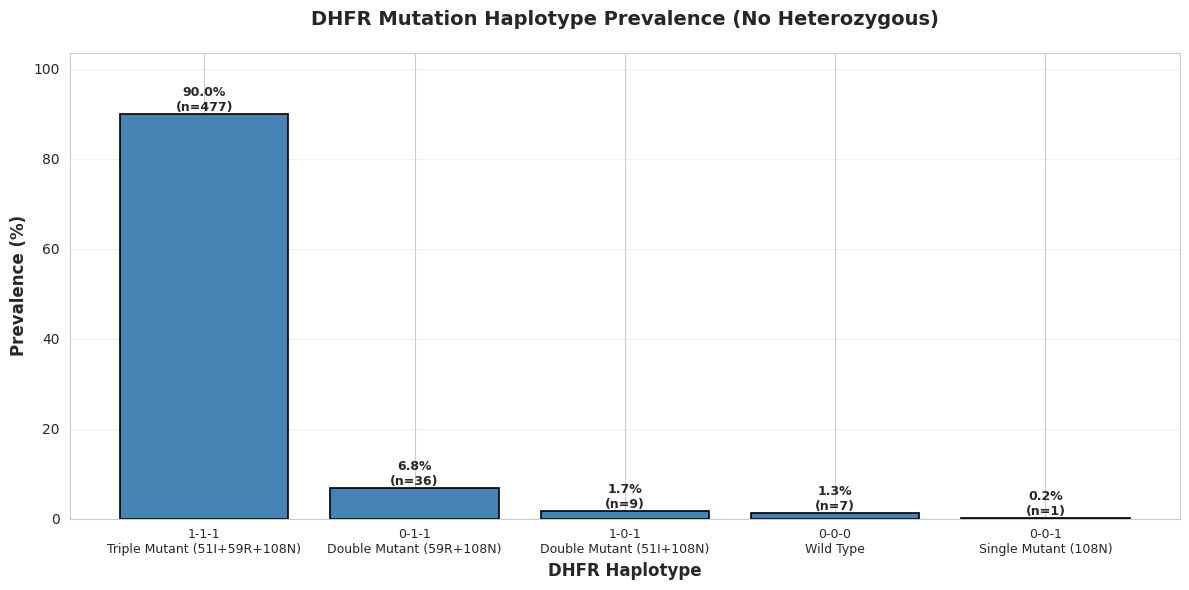


Plot saved to: RESULTS/dhfr_no_het.png


In [ ]:
# Create bar chart for haplotype prevalence
fig, ax = plt.subplots(figsize=(12, 6))

# Sort by prevalence
haplotype_summary_sorted = haplotype_summary.sort_values('Prevalence (%)', ascending=False)

# Create labels with both haplotype and description
labels = [f"{row['Haplotype']}\n{row['Description']}" if pd.notna(row['Description']) 
        else row['Haplotype'] 
        for _, row in haplotype_summary_sorted.iterrows()]

# Create bar plot
bars = ax.bar(range(len(haplotype_summary_sorted)), 
            haplotype_summary_sorted['Prevalence (%)'],
            color='steelblue', 
            edgecolor='black', 
            linewidth=1.2)

# Add value labels on top of bars
for i, (bar, value) in enumerate(zip(bars, haplotype_summary_sorted['Prevalence (%)'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.1f}%\n(n={haplotype_summary_sorted.iloc[i]["Count"]})',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Customize plot
ax.set_xlabel('DHFR Haplotype', fontsize=12, fontweight='bold')
ax.set_ylabel('Prevalence (%)', fontsize=12, fontweight='bold')
ax.set_title('DHFR Mutation Haplotype Prevalence (No Heterozygous)', 
            fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(len(haplotype_summary_sorted)))
ax.set_xticklabels(labels, fontsize=9)
ax.set_ylim(0, max(haplotype_summary_sorted['Prevalence (%)']) * 1.15)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('RESULTS/dhfr_no_het.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to: RESULTS/dhfr_no_het.png")

## 6. Additional Visualization: Individual Mutation Prevalence

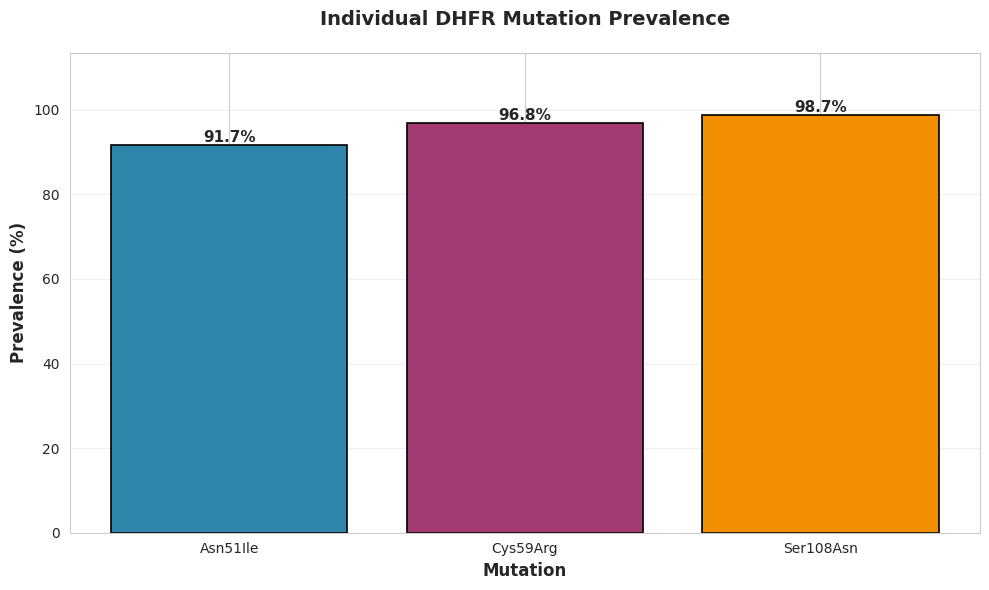


Plot saved to: RESULTS/dhfr_individual_mutations.png


In [8]:
# Create bar chart for individual mutation prevalence
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(prevalence_df['Mutation'], prevalence_df['Prevalence (%)'],
            color=['#2E86AB', '#A23B72', '#F18F01'], 
            edgecolor='black', 
            linewidth=1.2)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Mutation', fontsize=12, fontweight='bold')
ax.set_ylabel('Prevalence (%)', fontsize=12, fontweight='bold')
ax.set_title('Individual DHFR Mutation Prevalence', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, max(prevalence_df['Prevalence (%)']) * 1.15)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('RESULTS/dhfr_individual_mutations.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to: RESULTS/dhfr_individual_mutations.png")

## 7. Summary Statistics

In [9]:
# Summary statistics
print("="*60)
print("DHFR MUTATION ANALYSIS SUMMARY (NO HETEROZYGOUS)")
print("="*60)
print(f"\nTotal samples analyzed: {len(df_clean)}")
print(f"Samples excluded (missing data): {len(df) - len(df_clean)}")
print("\n" + "="*60)
print("INDIVIDUAL MUTATION PREVALENCE:")
print("="*60)
for _, row in prevalence_df.iterrows():
    count = (df_clean[row['Mutation']] == 1).sum()
    print(f"{row['Mutation']:15s}: {row['Prevalence (%)']:5.1f}% ({count}/{len(df_clean)} samples)")

print("\n" + "="*60)
print("HAPLOTYPE FREQUENCIES:")
print("="*60)
for _, row in haplotype_summary_sorted.iterrows():
    desc = f" - {row['Description']}" if pd.notna(row['Description']) else ""
    print(f"{row['Haplotype']:6s}{desc:40s}: {row['Prevalence (%)']:5.1f}% ({row['Count']} samples)")
print("="*60)

DHFR MUTATION ANALYSIS SUMMARY (NO HETEROZYGOUS)

Total samples analyzed: 530
Samples excluded (missing data): 23

INDIVIDUAL MUTATION PREVALENCE:
Asn51Ile       :  91.7% (486/530 samples)
Cys59Arg       :  96.8% (513/530 samples)
Ser108Asn      :  98.7% (523/530 samples)

HAPLOTYPE FREQUENCIES:
1-1-1  - Triple Mutant (51I+59R+108N)         :  90.0% (477 samples)
0-1-1  - Double Mutant (59R+108N)             :   6.8% (36 samples)
1-0-1  - Double Mutant (51I+108N)             :   1.7% (9 samples)
0-0-0  - Wild Type                            :   1.3% (7 samples)
0-0-1  - Single Mutant (108N)                 :   0.2% (1 samples)
